# Trabajo 2 redes


In [1]:
!pip install sweetviz
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 42.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 39.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 38.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 40.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 32.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [2]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.0 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install seaborn
!pip install kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.4 MB/s eta 0:00:00a 0:00:01


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from IPython.display import display, HTML
from matplotlib.patches import Patch

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from feature_engine.imputation import CategoricalImputer

import kagglehub
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-29 23:19:53.827665: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-29 23:19:54.024052: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [5]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
colors = sns.color_palette("tab10")

In [6]:
# Download latest version
path = kagglehub.dataset_download("ranadeep/credit-risk-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 101M/101M [00:04<00:00, 25.3MB/s]

Extracting model files...


Path to dataset files: /root/.cache/kagglehub/datasets/ranadeep/credit-risk-dataset/versions/3


In [7]:
# Funcion para mostrar dataframes en jupyter como una seccion scrolleable

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
def show_dataframe(df):
    display(HTML(f"""
    <div style="height: 300px; overflow: auto; border: 1px solid black;">
        {df.to_html()}
    </div>
    """))


In [8]:
files = os.listdir(path)
print(files)
files_loan = os.listdir(path+"/loan")
print(files_loan)

['loan', 'LCDataDictionary.xlsx']
['loan.csv']


In [9]:
datos_crudos = pd.read_csv(os.path.join(path,'loan/loan.csv'))

/tmp/ipykernel_393/1281765618.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_crudos = pd.read_csv(os.path.join(path,'loan/loan.csv'))


In [10]:
datos_crudos.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
datos_crudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [12]:
loan_status_levels = datos_crudos['loan_status'].unique()

results = {}
for level in loan_status_levels:
    filtered = datos_crudos[datos_crudos['loan_status'] == level]
    results[level] = filtered['next_pymnt_d'].isna().all()

for level, is_always_nan in results.items():
    print(f"Cuando loan_status = '{level}', ¿next_payment_d siempre es NaN?: {is_always_nan}")

Cuando loan_status = 'Fully Paid', ¿next_payment_d siempre es NaN?: True
Cuando loan_status = 'Charged Off', ¿next_payment_d siempre es NaN?: True
Cuando loan_status = 'Current', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'Default', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'Late (31-120 days)', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'In Grace Period', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'Late (16-30 days)', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'Does not meet the credit policy. Status:Fully Paid', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'Does not meet the credit policy. Status:Charged Off', ¿next_payment_d siempre es NaN?: False
Cuando loan_status = 'Issued', ¿next_payment_d siempre es NaN?: False


In [13]:
datos_crudos.drop(['id', 'member_id', 'url', 'title', 'purpose', 'emp_title', 'zip_code', 'next_pymnt_d'], axis = 1, inplace = True)

In [14]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    datos_crudos[col] = pd.to_datetime(datos_crudos[col], format='%b-%Y', errors='coerce')
    datos_crudos[f'{col}_year'] = datos_crudos[col].dt.year
    datos_crudos[f'{col}_month'] = datos_crudos[col].dt.month
    datos_crudos[f'{col}_day_of_week'] = datos_crudos[col].dt.dayofweek

In [15]:
reference_date = pd.to_datetime('2025-01-01')

datos_crudos['loan_age_years'] = (reference_date - datos_crudos['issue_d']).dt.days / 365
datos_crudos['credit_history_years'] = (reference_date - datos_crudos['earliest_cr_line']).dt.days / 365
datos_crudos['days_since_last_payment'] = (reference_date - datos_crudos['last_pymnt_d']).dt.days
datos_crudos['days_since_last_credit_pull'] = (reference_date - datos_crudos['last_credit_pull_d']).dt.days

In [16]:
datos_crudos = datos_crudos.drop(columns=date_columns)

In [17]:
datos_crudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       887379 non-null  float64
 1   funded_amnt                     887379 non-null  float64
 2   funded_amnt_inv                 887379 non-null  float64
 3   term                            887379 non-null  object 
 4   int_rate                        887379 non-null  float64
 5   installment                     887379 non-null  float64
 6   grade                           887379 non-null  object 
 7   sub_grade                       887379 non-null  object 
 8   emp_length                      842554 non-null  object 
 9   home_ownership                  887379 non-null  object 
 10  annual_inc                      887375 non-null  float64
 11  verification_status             887379 non-null  object 
 12  loan_status     

In [18]:
datos_crudos.dropna(thresh = datos_crudos.shape[0]*0.6, axis = 1, inplace = True)

In [19]:
datos_crudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       887379 non-null  float64
 1   funded_amnt                     887379 non-null  float64
 2   funded_amnt_inv                 887379 non-null  float64
 3   term                            887379 non-null  object 
 4   int_rate                        887379 non-null  float64
 5   installment                     887379 non-null  float64
 6   grade                           887379 non-null  object 
 7   sub_grade                       887379 non-null  object 
 8   emp_length                      842554 non-null  object 
 9   home_ownership                  887379 non-null  object 
 10  annual_inc                      887375 non-null  float64
 11  verification_status             887379 non-null  object 
 12  loan_status     

In [20]:
X = datos_crudos.drop('loan_status', axis = 1)
y = datos_crudos['loan_status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [22]:
copia2 = y_train.copy()

In [23]:
categorical_columns = X_train.select_dtypes(include='object').columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

In [24]:
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
X_train[categorical_columns] = categorical_imputer.fit_transform(X_train[categorical_columns])
X_val[categorical_columns] = categorical_imputer.transform(X_val[categorical_columns])
X_test[categorical_columns] = categorical_imputer.transform(X_test[categorical_columns])

In [25]:
numerical_imputer = IterativeImputer(max_iter=10, random_state=42)
X_train[numerical_columns] = numerical_imputer.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = numerical_imputer.transform(X_val[numerical_columns])
X_test[numerical_columns] = numerical_imputer.transform(X_test[numerical_columns])

In [26]:
X_train.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_year,issue_d_month,issue_d_day_of_week,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day_of_week,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day_of_week,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day_of_week,loan_age_years,credit_history_years,days_since_last_payment,days_since_last_credit_pull
58582,5500.0,5500.0,5475.0,36 months,8.90,174.65,A,A5,10+ years,RENT,21000.0,Not Verified,n,WI,19.60,1.0,1.0,12.0,0.0,8114.0,55.2,43.0,w,1839.03,1830.67,4364.99,4345.15,3660.97,704.02,0.0,0.0,0.0,174.65,0.0,1.0,INDIVIDUAL,0.0,0.0,8114.0,14700.0,2013.0,11.0,4.0,1992.0,5.0,4.0,2015.0,12.0,1.0,2016.0,1.0,4.0,11.175342,32.693151,3319.0,3288.0
595044,8000.0,8000.0,8000.0,36 months,8.18,251.36,B,B1,10+ years,MORTGAGE,102000.0,Source Verified,n,TX,12.89,0.0,0.0,7.0,0.0,3023.0,36.4,15.0,w,7405.49,7405.49,746.81,746.81,594.51,152.30,0.0,0.0,0.0,251.36,0.0,1.0,INDIVIDUAL,0.0,0.0,441218.0,8300.0,2015.0,10.0,3.0,2004.0,1.0,3.0,2016.0,1.0,4.0,2016.0,1.0,4.0,9.260274,21.016438,3288.0,3288.0


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532427 entries, 58582 to 371582
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       532427 non-null  float64
 1   funded_amnt                     532427 non-null  float64
 2   funded_amnt_inv                 532427 non-null  float64
 3   term                            532427 non-null  object 
 4   int_rate                        532427 non-null  float64
 5   installment                     532427 non-null  float64
 6   grade                           532427 non-null  object 
 7   sub_grade                       532427 non-null  object 
 8   emp_length                      532427 non-null  object 
 9   home_ownership                  532427 non-null  object 
 10  annual_inc                      532427 non-null  float64
 11  verification_status             532427 non-null  object 
 12  pymnt_plan  

In [28]:
ohe = OneHotEncoder(sparse_output=False, drop='first')


X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[['home_ownership', 'addr_state', 'initial_list_status', 'application_type']]),
    columns=ohe.get_feature_names_out(['home_ownership', 'addr_state', 'initial_list_status', 'application_type'])
)

X_val_ohe = pd.DataFrame(
    ohe.transform(X_val[['home_ownership', 'addr_state', 'initial_list_status', 'application_type']]),
    columns=ohe.get_feature_names_out(['home_ownership', 'addr_state', 'initial_list_status', 'application_type'])
)

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[['home_ownership', 'addr_state', 'initial_list_status', 'application_type']]),
    columns=ohe.get_feature_names_out(['home_ownership', 'addr_state', 'initial_list_status', 'application_type'])
)

In [29]:
X_train_ohe.index = X_train.index
X_val_ohe.index = X_val.index
X_test_ohe.index = X_test.index

In [30]:
X_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532427 entries, 58582 to 371582
Data columns (total 57 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   home_ownership_MORTGAGE  532427 non-null  float64
 1   home_ownership_NONE      532427 non-null  float64
 2   home_ownership_OTHER     532427 non-null  float64
 3   home_ownership_OWN       532427 non-null  float64
 4   home_ownership_RENT      532427 non-null  float64
 5   addr_state_AL            532427 non-null  float64
 6   addr_state_AR            532427 non-null  float64
 7   addr_state_AZ            532427 non-null  float64
 8   addr_state_CA            532427 non-null  float64
 9   addr_state_CO            532427 non-null  float64
 10  addr_state_CT            532427 non-null  float64
 11  addr_state_DC            532427 non-null  float64
 12  addr_state_DE            532427 non-null  float64
 13  addr_state_FL            532427 non-null  float64
 14  

In [31]:
columns_to_encode = ['pymnt_plan']

le = LabelEncoder()

for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

In [32]:
X_train[['term', 'grade', 'sub_grade', 'emp_length']] = X_train[['term', 'grade', 'sub_grade', 'emp_length']].apply(lambda x: x.str.strip())
X_val[['term', 'grade', 'sub_grade', 'emp_length']] = X_val[['term', 'grade', 'sub_grade', 'emp_length']].apply(lambda x: x.str.strip())
X_test[['term', 'grade', 'sub_grade', 'emp_length']] = X_test[['term', 'grade', 'sub_grade', 'emp_length']].apply(lambda x: x.str.strip())

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532427 entries, 58582 to 371582
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       532427 non-null  float64
 1   funded_amnt                     532427 non-null  float64
 2   funded_amnt_inv                 532427 non-null  float64
 3   term                            532427 non-null  object 
 4   int_rate                        532427 non-null  float64
 5   installment                     532427 non-null  float64
 6   grade                           532427 non-null  object 
 7   sub_grade                       532427 non-null  object 
 8   emp_length                      532427 non-null  object 
 9   home_ownership                  532427 non-null  object 
 10  annual_inc                      532427 non-null  float64
 11  verification_status             532427 non-null  object 
 12  pymnt_plan  

In [34]:
categories = [
    ['36 months', '60 months'],
    ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    ['A1', 'A2', 'A3', 'A4', 'A5',
    'B1', 'B2', 'B3', 'B4', 'B5',
    'C1', 'C2', 'C3', 'C4', 'C5',
    'D1', 'D2', 'D3', 'D4', 'D5',
    'E1', 'E2', 'E3', 'E4', 'E5',
    'F1', 'F2', 'F3', 'F4', 'F5',
    'G1', 'G2', 'G3', 'G4', 'G5'],
    ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'Missing'],
    ['Not Verified', 'Source Verified', 'Verified']
]

oe = OrdinalEncoder(categories=categories)

X_train_encoded = oe.fit_transform(X_train[['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']])
X_val_encoded = oe.transform(X_val[['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']])
X_test_encoded = oe.transform(X_test[['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']])

In [35]:
X_train[['term_encoded', 'grade_encoded', 'subgrade_encoded', 'emp_length_encoded', 'verification_status_encoded']] = X_train_encoded
X_val[['term_encoded', 'grade_encoded', 'subgrade_encoded', 'emp_length_encoded', 'verification_status_encoded']] = X_val_encoded
X_test[['term_encoded', 'grade_encoded', 'subgrade_encoded', 'emp_length_encoded', 'verification_status_encoded']] = X_test_encoded

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532427 entries, 58582 to 371582
Data columns (total 61 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       532427 non-null  float64
 1   funded_amnt                     532427 non-null  float64
 2   funded_amnt_inv                 532427 non-null  float64
 3   term                            532427 non-null  object 
 4   int_rate                        532427 non-null  float64
 5   installment                     532427 non-null  float64
 6   grade                           532427 non-null  object 
 7   sub_grade                       532427 non-null  object 
 8   emp_length                      532427 non-null  object 
 9   home_ownership                  532427 non-null  object 
 10  annual_inc                      532427 non-null  float64
 11  verification_status             532427 non-null  object 
 12  pymnt_plan  

In [37]:
columns_to_drop = ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status' ,'home_ownership', 'addr_state', 'initial_list_status', 'application_type']

X_train.drop(columns=columns_to_drop, inplace=True, axis = 1)
X_val.drop(columns=columns_to_drop, inplace=True, axis = 1)
X_test.drop(columns=columns_to_drop, inplace=True, axis = 1)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532427 entries, 58582 to 371582
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       532427 non-null  float64
 1   funded_amnt                     532427 non-null  float64
 2   funded_amnt_inv                 532427 non-null  float64
 3   int_rate                        532427 non-null  float64
 4   installment                     532427 non-null  float64
 5   annual_inc                      532427 non-null  float64
 6   pymnt_plan                      532427 non-null  int64  
 7   dti                             532427 non-null  float64
 8   delinq_2yrs                     532427 non-null  float64
 9   inq_last_6mths                  532427 non-null  float64
 10  open_acc                        532427 non-null  float64
 11  pub_rec                         532427 non-null  float64
 12  revol_bal   

In [39]:
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_val = pd.concat([X_val, X_val_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532427 entries, 58582 to 371582
Columns: 109 entries, loan_amnt to application_type_JOINT
dtypes: float64(108), int64(1)
memory usage: 446.8 MB


In [41]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_d_year,issue_d_month,issue_d_day_of_week,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day_of_week,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day_of_week,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day_of_week,loan_age_years,credit_history_years,days_since_last_payment,days_since_last_credit_pull,term_encoded,grade_encoded,subgrade_encoded,emp_length_encoded,verification_status_encoded,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_JOINT
58582,5500.0,5500.0,5475.0,8.90,174.65,21000.0,0,19.60,1.0,1.0,12.0,0.0,8114.0,55.2,43.0,1839.03,1830.67,4364.99,4345.15,3660.97,704.02,0.0,0.0,0.0,174.65,0.0,1.0,0.0,0.0,8114.0,14700.0,2013.0,11.0,4.0,1992.0,5.0,4.0,2015.0,12.0,1.0,2016.0,1.0,4.0,11.175342,32.693151,3319.0,3288.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
595044,8000.0,8000.0,8000.0,8.18,251.36,102000.0,0,12.89,0.0,0.0,7.0,0.0,3023.0,36.4,15.0,7405.49,7405.49,746.81,746.81,594.51,152.30,0.0,0.0,0.0,251.36,0.0,1.0,0.0,0.0,441218.0,8300.0,2015.0,10.0,3.0,2004.0,1.0,3.0,2016.0,1.0,4.0,2016.0,1.0,4.0,9.260274,21.016438,3288.0,3288.0,0.0,1.0,5.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
702690,10000.0,10000.0,10000.0,13.99,341.73,60000.0,0,11.04,0.0,3.0,8.0,0.0,5907.0,22.5,14.0,8609.13,8609.13,2042.61,2042.61,1390.87,651.74,0.0,0.0,0.0,341.73,0.0,1.0,0.0,0.0,14202.0,26200.0,2015.0,7.0,2.0,2007.0,10.0,0.0,2016.0,1.0,4.0,2016.0,1.0,4.0,9.512329,17.265753,3288.0,3288.0,0.0,2.0,13.0,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
418470,30000.0,30000.0,30000.0,15.61,723.34,108000.0,0,11.22,0.0,2.0,12.0,1.0,27986.0,88.3,19.0,22015.64,22015.64,15190.14,15190.14,7984.36,7205.78,0.0,0.0,0.0,723.34,0.0,1.0,0.0,0.0,265563.0,31700.0,2014.0,3.0,5.0,1998.0,12.0,1.0,2015.0,12.0,1.0,2016.0,1.0,4.0,10.846575,26.104110,3319.0,3288.0,1.0,2.0,14.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
245693,25000.0,25000.0,25000.0,9.49,524.93,98000.0,0,30.72,0.0,0.0,12.0,0.0,49343.0,88.7,15.0,20538.30,20538.30,6810.91,6810.91,4461.70,2349.21,0.0,0.0,0.0,524.93

In [42]:
copia_train = y_train.copy()

In [43]:
le = LabelEncoder()
y_train = pd.Series(le.fit_transform(y_train))

In [44]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [45]:
importances = rf.feature_importances_
features = X_train.columns

In [46]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [47]:
importance_df.head(20)

,Feature,Importance
16,out_prncp_inv,0.147789
15,out_prncp,0.119037
45,days_since_last_payment,0.110787
24,last_pymnt_amnt,0.092291
37,last_pymnt_d_year,0.048645
38,last_pymnt_d_month,0.048165
46,days_since_last_credit_pull,0.041773
19,total_rec_prncp,0.041636
40,last_credit_pull_d_year,0.036328
41,last_credit_pull_d_month,0.030537


In [48]:
X_train = X_train[importance_df['Feature'].iloc[0:19]]
X_val = X_val[importance_df['Feature'].iloc[0:19]]
X_test = X_test[importance_df['Feature'].iloc[0:19]]

In [49]:
X_train.head()

,out_prncp_inv,out_prncp,days_since_last_payment,last_pymnt_amnt,last_pymnt_d_year,last_pymnt_d_month,days_since_last_credit_pull,total_rec_prncp,last_credit_pull_d_year,last_credit_pull_d_month,recoveries,last_pymnt_d_day_of_week,collection_recovery_fee,total_pymnt,total_pymnt_inv,issue_d_year,loan_age_years,last_credit_pull_d_day_of_week,installment
58582,1830.67,1839.03,3319.0,174.65,2015.0,12.0,3288.0,3660.97,2016.0,1.0,0.0,1.0,0.0,4364.99,4345.15,2013.0,11.175342,4.0,174.65
595044,7405.49,7405.49,3288.0,251.36,2016.0,1.0,3288.0,594.51,2016.0,1.0,0.0,4.0,0.0,746.81,746.81,2015.0,9.260274,4.0,251.36
702690,8609.13,8609.13,3288.0,341.73,2016.0,1.0,3288.0,1390.87,2016.0,1.0,0.0,4.0,0.0,2042.61,2042.61,2015.0,9.512329,4.0,341.73
418470,22015.64,22015.64,3319.0,723.34,2015.0,12.0,3288.0,7984.36,2016.0,1.0,0.0,1.0,0.0,15190.14,15190.14,2014.0,10.846575,4.0,723.34
245693,20538.30,20538.30,3319.0,524.93,2015.0,12.0,3288.0,4461.70,2016.0,1.0,0.0,1.0,0.0,6810.91,6810.91,2014.0,10.175342,4.0,524.93


In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [52]:
X_train_scaled.head()

,out_prncp_inv,out_prncp,days_since_last_payment,last_pymnt_amnt,last_pymnt_d_year,last_pymnt_d_month,days_since_last_credit_pull,total_rec_prncp,last_credit_pull_d_year,last_credit_pull_d_month,recoveries,last_pymnt_d_day_of_week,collection_recovery_fee,total_pymnt,total_pymnt_inv,issue_d_year,loan_age_years,last_credit_pull_d_day_of_week,installment
0,-0.773624,-0.772727,-0.363335,-0.414939,-0.315373,1.637908,-0.302258,-0.316380,0.376107,-0.400922,-0.111823,-1.456399,-0.076448,-0.405606,-0.404627,-0.808381,0.535995,0.198883,-1.072672
1,-0.116495,-0.116849,-0.464241,-0.398949,0.696139,-0.790610,-0.302258,-0.778963,0.376107,-0.400922,-0.111823,0.502883,-0.076448,-0.864982,-0.862922,0.775600,-0.956119,0.198883,-0.758420
2,0.025383,0.024972,-0.464241,-0.380112,0.696139,-0.790610,-0.302258,-0.658830,0.376107,-0.400922,-0.111823,0.502883,-0.076448,-0.700463,-0.697885,0.775600,-0.759732,0.198883,-0.388208
3,1.605668,1.604617,-0.363335,-0.300566,-0.315373,1.637908,-0.302258,0.335815,0.376107,-0.400922,-0.111823,-1.456399,-0.076448,0.968788,0.976623,-0.016391,0.279838,0.198883,1.175102
4,1.431527,1.430547,-0.363335,-0.341924,-0.315373,1.637908,-0.302258,-0.195587,0.376107,-0.400922,-0.111823,-1.456399,-0.076448,-0.095065,-0.090580,-0.016391,-0.243149,0.198883,0.362292


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

In [54]:
from sklearn.metrics import f1_score
import numpy as np

class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_X, val_y = self.validation_data
        val_y_true = np.argmax(val_y, axis=1)  # Etiquetas reales
        val_y_pred = np.argmax(self.model.predict(val_X), axis=1)  # Predicciones
        f1_macro = f1_score(val_y_true, val_y_pred, average='macro')
        print(f"Epoch {epoch + 1}: F1-Score Macro = {f1_macro:.4f}")

In [55]:
copia2.value_counts()

Current                                                361097
Fully Paid                                             124722
Charged Off                                             27114
Late (31-120 days)                                       6955
Issued                                                   5062
In Grace Period                                          3748
Late (16-30 days)                                        1357
Does not meet the credit policy. Status:Fully Paid       1189
Default                                                   712
Does not meet the credit policy. Status:Charged Off       471
Name: loan_status, dtype: int64

In [56]:
y_val.value_counts()

Current                                                120560
Fully Paid                                              41300
Charged Off                                              9125
Late (31-120 days)                                       2252
Issued                                                   1695
In Grace Period                                          1281
Late (16-30 days)                                         490
Does not meet the credit policy. Status:Fully Paid        389
Default                                                   243
Does not meet the credit policy. Status:Charged Off       141
Name: loan_status, dtype: int64

In [ ]:
y_train_array = y_train_bal.to_numpy()
y_val_array = y_val.to_numpy()
y_test_array = y_test.to_numpy()

encoder = OneHotEncoder(sparse_output=False)

y_train_onehot = encoder.fit_transform(y_train_array.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val_array.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test_array.reshape(-1, 1))

In [60]:
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from sklearn.metrics import classification_report
import tensorflow as tf

# Agrupamiento de clases
class_mapping = {
    'Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Charged Off': 'Charged Off',
    'Does not meet the credit policy. Status:Charged Off': 'Charged Off',
    'Default': 'Charged Off',
    'Late (31-120 days)': 'Late',
    'Late (16-30 days)': 'Late',
    'Issued': 'In Progress',
    'In Grace Period': 'In Progress',
    'Current': 'Current'
}

# Aplicar el mapeo a las etiquetas originales
y_train_grouped = copia2.map(class_mapping)
y_val_grouped = y_val.map(class_mapping)
y_test_grouped = y_test.map(class_mapping)

# Verificar distribución después del agrupamiento
print("Distribución de clases agrupadas (entrenamiento):")
print(y_train_grouped.value_counts())

# Estrategia de re-muestreo
undersample_strategy = {
    'Current': 100000,  # Reducir la mayoritaria
    'Fully Paid': 80000
}

oversample_strategy = {
    'Charged Off': 50000,
    'Late': 30000,
    'In Progress': 70000
}

pipeline = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)),
    ('smote', SMOTE(sampling_strategy=oversample_strategy, random_state=42))
])

# Aplicar el pipeline de balanceo
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train_grouped)

# Verificar la distribución después del balanceo
print("Distribución de clases después del re-muestreo:")
print(pd.Series(y_train_bal).value_counts())

# Calcular los pesos de las clases
class_weights_dict = {
    2: 1.16,  # Charged Off
    0: 0.58,  # Current
    1: 0.725, # Fully Paid
    3: 10, # In Progress
    4: 1.933  # Late
}

# One-Hot Encoding para las etiquetas
encoder = OneHotEncoder(sparse_output=False)

y_train_onehot = encoder.fit_transform(y_train_bal.to_numpy().reshape(-1, 1))
y_val_onehot = encoder.transform(y_val_grouped.to_numpy().reshape(-1, 1))
y_test_onehot = encoder.transform(y_test_grouped.to_numpy().reshape(-1, 1))

# Verificar las dimensiones de las etiquetas codificadas
print("Shape de y_train_onehot:", y_train_onehot.shape)

# Definir el modelo
model = Sequential([
    Dense(1024, activation="relu", input_dim=X_train_bal.shape[1]),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(len(encoder.categories_[0]), activation="softmax")  # Número de clases agrupadas
])

# Definir la función de pérdida focal
def focal_loss_multiclass(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_true = tf.cast(y_true, tf.float32)  # Asegurar que y_true sea float
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        focal_loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(focal_loss, axis=-1))
    return loss

# Definir un callback extendido para métricas por clase
class ExtendedMetricsCallback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_data, val_labels = self.validation_data
        val_predictions = np.argmax(self.model.predict(val_data), axis=-1)
        val_true_labels = np.argmax(val_labels, axis=-1)
        print(classification_report(val_true_labels, val_predictions, target_names=encoder.categories_[0]))

# Definir el scheduler de tasa de aprendizaje
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=focal_loss_multiclass(alpha=0.25, gamma=2.0),
    metrics=["accuracy"]
)

# Entrenar el modelo
extended_metrics_callback = ExtendedMetricsCallback(validation_data=(X_val, y_val_onehot))

history = model.fit(
    X_train_bal, y_train_onehot,  # Usar etiquetas One-Hot
    epochs=75,
    batch_size=32,  # Ajusta según los recursos
    validation_data=(X_val, y_val_onehot),
    class_weight=class_weights_dict,
    callbacks=[extended_metrics_callback, lr_scheduler]
)

Distribución de clases agrupadas (entrenamiento):
Current        361097
Fully Paid     125911
Charged Off     28297
In Progress      8810
Late             8312
Name: loan_status, dtype: int64
Distribución de clases después del re-muestreo:
Current        100000
Fully Paid      80000
In Progress     70000
Charged Off     50000
Late            30000
Name: loan_status, dtype: int64
Shape de y_train_onehot: (330000, 5)
Epoch 1/75
5547/5547 [==============================] - 5s 940us/step
              precision    recall  f1-score   support

 Charged Off       0.98      0.95      0.96      9509
     Current       0.99      0.85      0.92    120560
  Fully Paid       0.99      1.00      0.99     41689
 In Progress       0.14      0.73      0.24      2976
        Late       0.26      0.71      0.38      2742

    accuracy                           0.89    177476
   macro avg       0.67      0.85      0.70    177476
weighted avg       0.97      0.89      0.92    177476

10313/10313 [=========

5547/5547 [==============================] - 6s 1ms/step


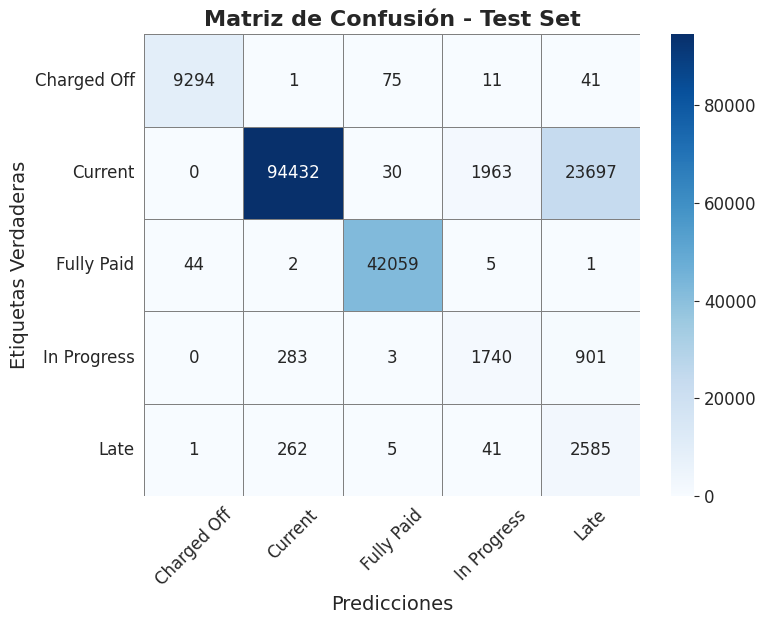

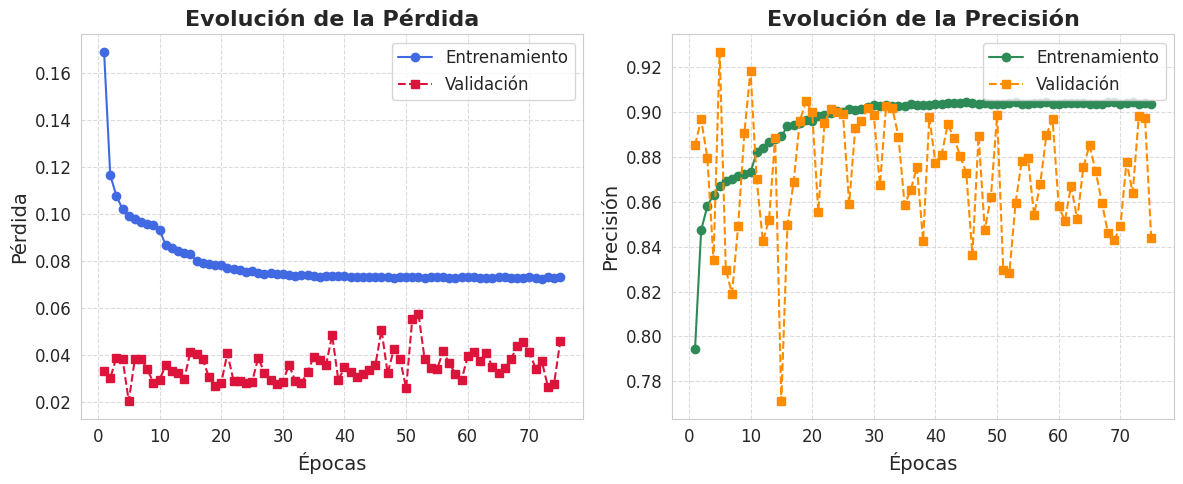

In [62]:
# Generar predicciones en el conjunto de prueba
y_test_pred_onehot = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_onehot, axis=1)  # Convertir predicciones one-hot a índices de clases
y_test_true = np.argmax(y_test_onehot, axis=1)       # Convertir etiquetas one-hot a índices de clases

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_true, y_test_pred)

# Etiquetas de las clases agrupadas
class_labels = encoder.categories_[0]  # Obtener las clases del codificador

# Visualizar la matriz de confusión con mejor diseño
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, linewidths=0.5, linecolor='gray')
plt.title("Matriz de Confusión - Test Set", fontsize=16, fontweight='bold')
plt.xlabel("Predicciones", fontsize=14)
plt.ylabel("Etiquetas Verdaderas", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Función para graficar Loss y Accuracy con mejor apariencia
def plot_training_history(history):
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Configuración de colores
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))

    # Gráfico de pérdida (Loss)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Entrenamiento', marker='o', linestyle='-', color='royalblue')
    plt.plot(epochs, history.history['val_loss'], label='Validación', marker='s', linestyle='--', color='crimson')
    plt.title("Evolución de la Pérdida", fontsize=16, fontweight='bold')
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Pérdida", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)

    # Gráfico de precisión (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Entrenamiento', marker='o', linestyle='-', color='seagreen')
    plt.plot(epochs, history.history['val_accuracy'], label='Validación', marker='s', linestyle='--', color='darkorange')
    plt.title("Evolución de la Precisión", fontsize=16, fontweight='bold')
    plt.xlabel("Épocas", fontsize=14)
    plt.ylabel("Precisión", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Llamar a la función con el historial de entrenamiento
plot_training_history(history)

In [69]:
import numpy as np
import pandas as pd

# Obtener los nombres de las características originales
feature_names = X_train_bal.columns.tolist()

# Extraer los pesos de la primera capa (directamente conectada a los inputs originales)
first_layer_weights, _ = model.layers[0].get_weights()
abs_first_layer_weights = np.abs(first_layer_weights)

# Inicializar la importancia con la suma de los pesos absolutos de la primera capa
previous_importance = abs_first_layer_weights.sum(axis=1)

# Crear un DataFrame con la importancia inicial de cada característica
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': previous_importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Mostrar la importancia de las características en la capa de entrada
print("\nImportancia de las características en la capa de entrada:")
display(feature_importance.head(10))

# Diccionario para guardar la importancia de cada capa
layer_importances = {'Capa 0': feature_importance}

# Propagar la importancia a capas posteriores
for i, layer in enumerate(model.layers[1:]):  # Desde la segunda capa en adelante
    if isinstance(layer, tf.keras.layers.Dense):  
        weights, _ = layer.get_weights()
        
        # Verificar que los pesos sean compatibles para la propagación
        if previous_importance.shape[0] != weights.shape[0]:
            print(f"⚠️ Advertencia: No se puede propagar importancia en la Capa {i+1} "
                  f"({previous_importance.shape[0]} vs {weights.shape[0]}). Saltando.")
            continue

        # Propagar la importancia multiplicando por los pesos absolutos
        new_importance = np.abs(weights) @ previous_importance  # Matriz de pesos x importancia previa

        # Reducir a las características originales sumando la importancia de las conexiones a cada una
        feature_importance = new_importance[:len(feature_names)]

        # Crear DataFrame para esta capa
        layer_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        layer_df = layer_df.sort_values(by='Importance', ascending=False)

        # Guardar en el diccionario
        layer_importances[f'Capa {i+1}'] = layer_df
        
        # Actualizar la importancia para la siguiente iteración
        previous_importance = new_importance

# Mostrar la importancia de las características en cada capa
for layer, df in layer_importances.items():
    print(f"\n{layer} - Características más importantes:")
    display(df.head(19))  # Muestra las 10 características más importantes en cada capa


Importancia de las características en la capa de entrada:


,Feature,Importance
11,last_pymnt_d_day_of_week,1644.288574
5,last_pymnt_d_month,1508.413818
9,last_credit_pull_d_month,562.279358
16,loan_age_years,482.754181
18,installment,303.830078
10,recoveries,258.369934
2,days_since_last_payment,256.875885
17,last_credit_pull_d_day_of_week,234.173584
0,out_prncp_inv,204.917572
1,out_prncp,204.653198


⚠️ Advertencia: No se puede propagar importancia en la Capa 3 (19 vs 1024). Saltando.
⚠️ Advertencia: No se puede propagar importancia en la Capa 6 (19 vs 512). Saltando.
⚠️ Advertencia: No se puede propagar importancia en la Capa 9 (19 vs 256). Saltando.
⚠️ Advertencia: No se puede propagar importancia en la Capa 12 (19 vs 128). Saltando.
⚠️ Advertencia: No se puede propagar importancia en la Capa 15 (19 vs 64). Saltando.

Capa 0 - Características más importantes:


,Feature,Importance
11,last_pymnt_d_day_of_week,1644.288574
5,last_pymnt_d_month,1508.413818
9,last_credit_pull_d_month,562.279358
16,loan_age_years,482.754181
18,installment,303.830078
10,recoveries,258.369934
2,days_since_last_payment,256.875885
17,last_credit_pull_d_day_of_week,234.173584
0,out_prncp_inv,204.917572
1,out_prncp,204.653198


In [63]:
model.save('modelo_final_bueno.h5')